<a href="https://colab.research.google.com/github/andressapedrosa/data_science_ml/blob/main/Previsao_Expectativa_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.preprocessing import LabelEncoder # usado para as transformações Categóricas
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score # usado para validar os modelos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
#from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Configurações de propriedades
pd.set_option("display.max_columns", None)

#Previsão de Expectativa de Vida com base em Modelos de Machine Learning de Regressão

O objetivo deste trabalho é explorar o treinamento e a comparação de diversos modelos de Machine Learning voltados para problemas de regressão.
</br></br>Foi utilizado o dataset [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), disponível no Kaggle.
Este fornece informações relevantes sobre fatores socioeconômicos, ambientais e de saúde pública que influenciam na expectativa de vida. De maneira intuitiva, podemos dizer que quanto melhores avaliados estes fatores, maior será a expectativa de vida. Ao longo do trabalho detalharemos melhor estas relações.
</br>Não foi realizada nenhuma restrição quanto ao dataset: todos os dados fornecidos pela plataforma Kaggle foram considerados ao longo deste trabalho.
</br></br>Abaixo seguem mais detalhes sobre os dados fornecidos:</br>

COLUNA             | DESCRIÇÃO
-------------------|------------------
Country | O nome do país para o qual os dados foram registrados.
Year | O ano em que os dados foram coletados, representando o aspecto temporal do conjunto de dados.
Status | O status de desenvolvimento do país, frequentemente categorizado como "Desenvolvido" ou "Em Desenvolvimento". Isso indica o desenvolvimento econômico e social geral do país.
Life Expectancy | O número médio de anos que uma pessoa nascida naquele ano pode esperar viver, servindo como um importante indicador de saúde. Trata-se da variável *target* do problema.
Adult Mortality | A probabilidade de morrer entre as idades de 15 e 60 anos por 1.000 habitantes.
Infant Deaths | O número de mortes infantis por 1.000 nascidos vivos.
Alcohol | O consumo médio de álcool em litros per capita.
Percentage Expenditure | Despesa com saúde como percentual do PIB do país.
Hepatitis B | Cobertura de imunização para Hepatite B no país.
Measles | O número de casos relatados de sarampo por 1.000 habitantes.
BMI | O Índice de Massa Corporal (IMC) médio da população.
Under-Five Deaths | O número de mortes de crianças menores de cinco anos por 1.000 nascidos vivos.
Polio | Cobertura de imunização para poliomielite no país.
Total Expenditure | A despesa total com saúde como percentual do PIB do país.
Diphtheria | Cobertura de imunização para difteria no país.
HIV/AIDS | A prevalência de HIV/AIDS como percentual da população.
GDP | Produto Interno Bruto, representando o desempenho econômico do país.
Population | A população total do país.
Thinness 1-19 Years | Prevalência de magreza entre crianças e adolescentes de 1 a 19 anos.
Thinness 5-9 Years | Prevalência de magreza entre crianças de 5 a 9 anos.
Income Composition of Resources | Um índice composto que reflete a distribuição de renda e o acesso a recursos no país.
Schooling | O número médio de anos de escolaridade recebidos pela população.

O trabalho será conduzido em um fluxo estruturado, contemplando as seguintes etapas:
1. **Carga e preparação dos dados**: leitura do dataset e análise exploratória inicial.  
2. **Separação entre dados de treino e teste**: divisão dos dados para garantir a avaliação imparcial dos modelos.
3. **Modelagem**: treinamento de diversos algoritmos de regressão para identificar aqueles com melhor desempenho.  
4. **Otimização de hiperparâmetros**: ajuste dos modelos para maximizar a performance.  
5. **Avaliação e comparação**: análise das métricas de desempenho para determinar o modelo mais adequado ao problema.

Este trabalho ilustra o processo completo de solução de um problema de regressão, desde a preparação dos dados até a comparação dos resultados dos modelos treinados. Ao final deste notebook, será possível identificar o modelo mais eficiente e interpretar os fatores mais relevantes para a previsão da expectativa de vida.


# Carregamento e Exploração do Dataset

In [ ]:
url = "https://raw.githubusercontent.com/andressapedrosa/data_science_ml/refs/heads/main/Life_Expectancy_Data.csv"

df_life_expec_original = pd.read_csv(url)

## Visualização Geral dos Dados

De acordo com as duas células de código a seguir, obtemos alguns insights interessantes:
- aparentemente existem dados disponíveis desde o ano de 2000 a 2015 (confirmaremos mais a frente)
- aparentemente os dados estão ordenados alfabeticamente pelo nome do país e, em seguida, em ordem decrescente do ano a ser considerado
- ambos os países listados estão em fase de Desenvolvimento , porém enquanto o Afeganistão aumentou sua expectativa de vida, ocorreu o inverso no Zimbábue (importante destacar que estão sendo considerados períodos de tempo distintos)


In [ ]:
# Primeiros registros do dataset
df_life_expec_original.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Últimos registros do dataset
df_life_expec_original.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.0,68,31,27.1,42,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.0,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.0,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.0,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
1648,Zimbabwe,2000,Developing,46.0,665,24,1.68,0.0,79,1483,25.5,39,78,7.10,78,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


## Informações Gerais do dataset

In [ ]:
# Dimensões do dataset
df_life_expec_original.shape

(1649, 22)

In [ ]:
# Explorando os tipos de dados de cada uma das 22 colunas e a quantidade de
# registros não nulos de cada uma delas
df_life_expec_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

Conforme visto acima, podemos identificar as seguintes características deste dataset:
* possui 22 colunas
* composto por 1.649 registros
* não possui dados nulos/faltantes

In [ ]:
# Criando uma cópia do dataset original
df_life_expec = df_life_expec_original.copy()

## Resumo estatístico do dataset

In [ ]:
# Resumo estatístico somente variáveis numéricas
df_life_expec.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [ ]:
# Resumo estatístico somente com variáveis do tipo 'object'
df_life_expec.describe(include='object')

,Country,Status
count,1649,1649
unique,133,2
top,Afghanistan,Developing
freq,16,1407


Algumas informações relevantes:
- conforme visto anteriormente, agora podemos confirmar que os dados compreendem os anos de 2000 a 2015
- foram considerados 133 países neste período e as expectativas de vida variaram de 44 a 89 anos, sendo 69 a idade média
- ~85% destes países não são desenvolvidos, ou seja, ainda estavam em desenvolvimento durante o período em questão
- a variação populacional é bem grande entre os países considerados e os respectivos períodos: variam desde 340 habitantes até ordens de grandeza de bilhões


# Analisando a distribuição dos dados

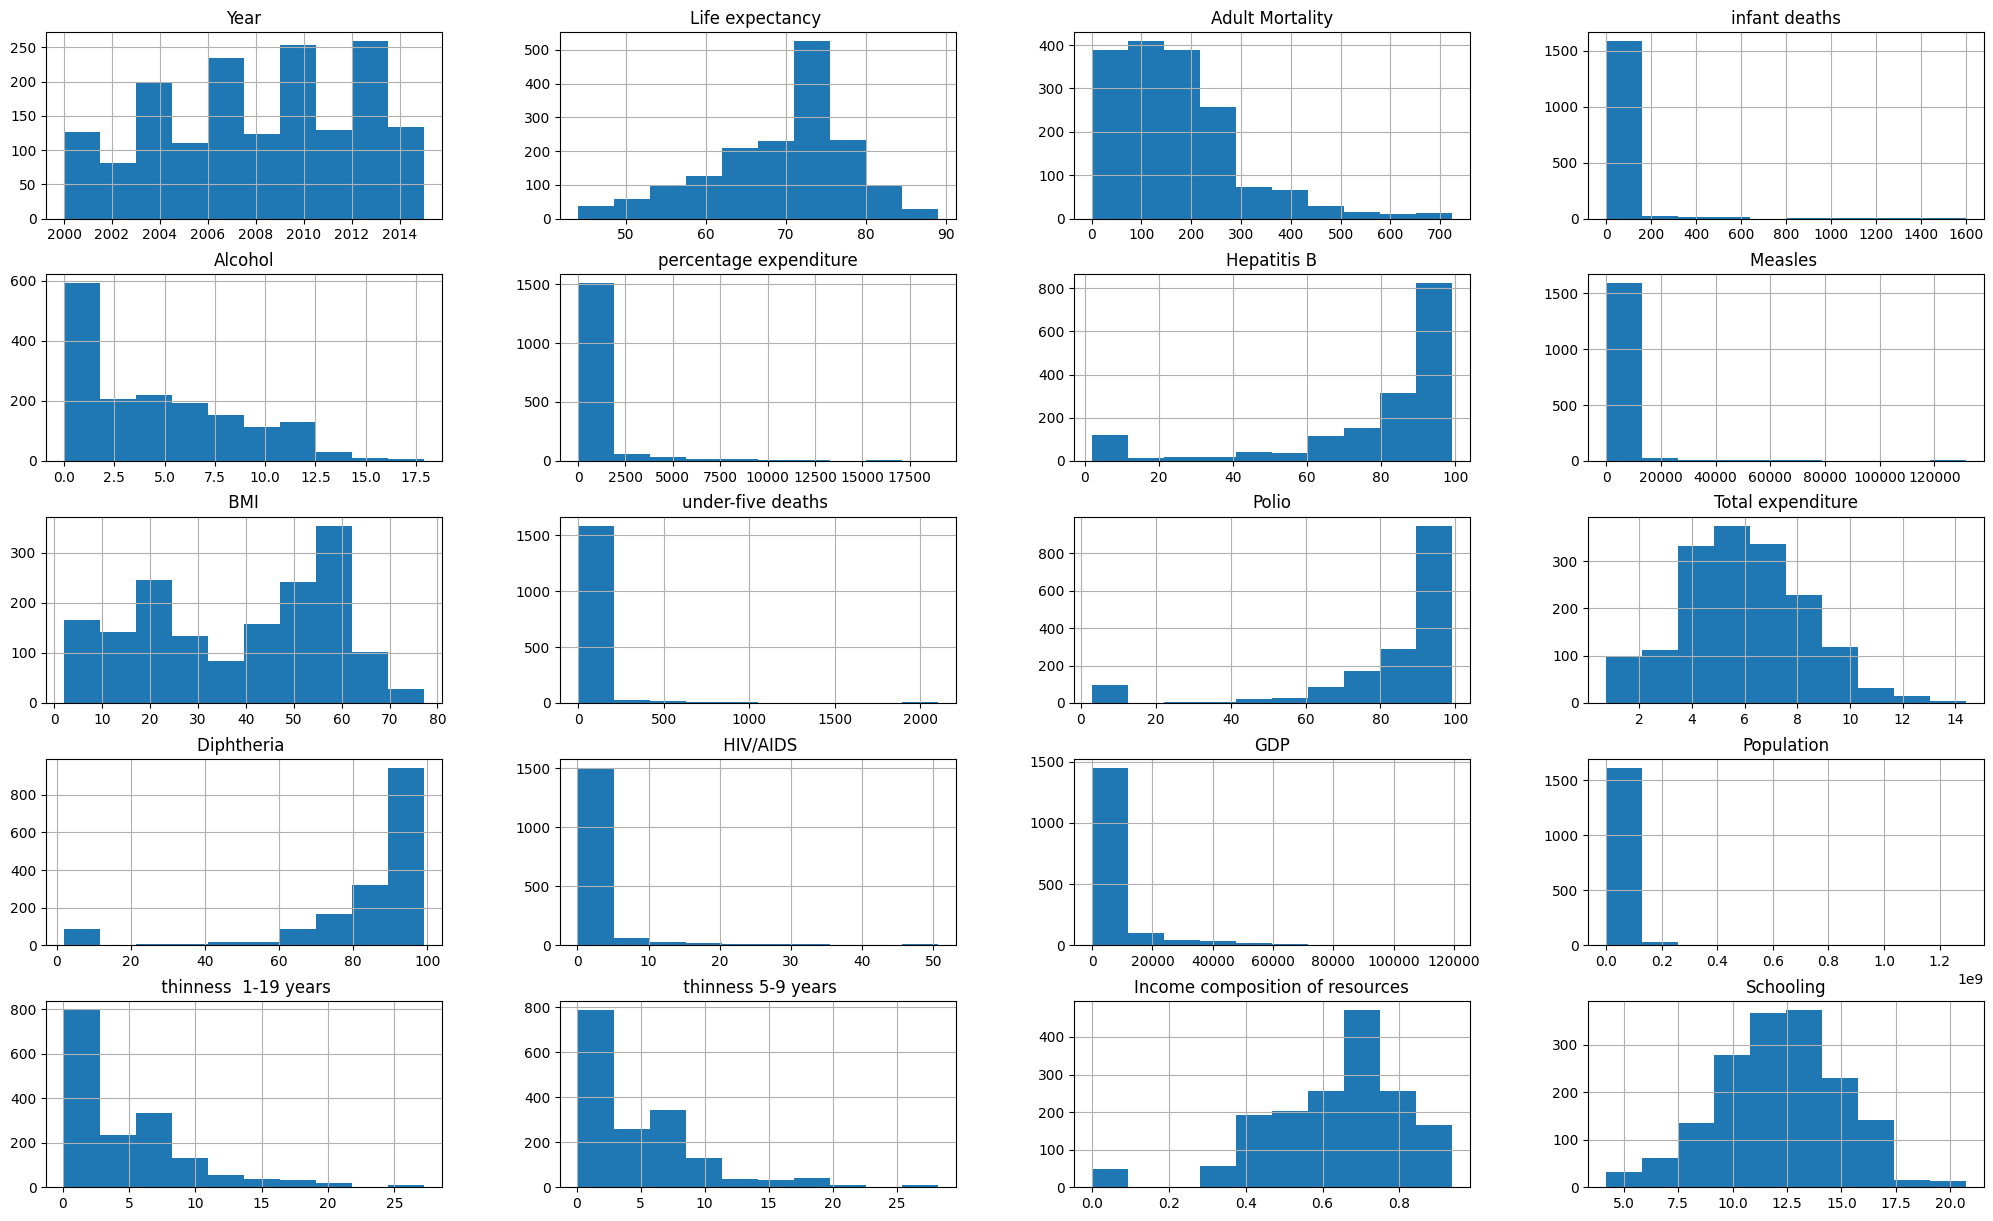

In [ ]:
# Histograma
df_life_expec.hist(figsize=(25,15))
plt.show()

Alguns insights interessantes dos gráficos acima:
- a **maioria dos países** possui uma **expectativa de vida entre 60 e 80 anos**
- **a maior parte das taxas de mortalidade de adultos está abaixo de 400**: o que se trata de um valor alto. Valores elevados podem estar associados a países com sistemas de saúde menos desenvolvidos ou até mesmo crises humanitárias.
- **a maioria dos países tem números muito baixos de mortes infantis, mas há indicações de outliers**, sugerindo que alguns países enfrentam taxas extremamente altas, possivelmente devido a pobreza ou acesso limitado à saúde
- **a maioria dos países gasta uma pequena porcentagem do PIB em saúde, mas há alguns outliers com gastos muito altos**, possivelmente os países desenvolvidos
- **a maioria dos países apresenta baixa taxa de mortalidade infantil, mas há um grupo de outliers com números elevados**
- **os gastos totais em saúde estão geralmente abaixo de 10% do PIB**, com poucos países gastando valores muito maiores (**mais outliers**)
- **a maioria dos países tem PIBs baixos, mas há alguns outliers** com PIBs muito elevados, representando economias maiores (provavelmente de países desenvolvidos)
- **a distribuição da população é assimétrica**, como já havíamos citado, com a maioria dos países tendo populações abaixo de 1 bilhão, enquanto alguns têm populações extremamente altas (China e Índia, por exemplo)
- **é bem forte a desigualdade no acesso a recursos relacionados à renda**: a maioria dos países apresenta valores médios a altos
- **os valores de escolaridade estão concentrados entre 8 e 14 anos, com a presença de outliers** tanto para valores significativamente mais baixos quanto para valores mais altos.

Abaixo serão apresentados visualizações boxplot para ilustrar a presença dos outliers mencionados nos itens acima:

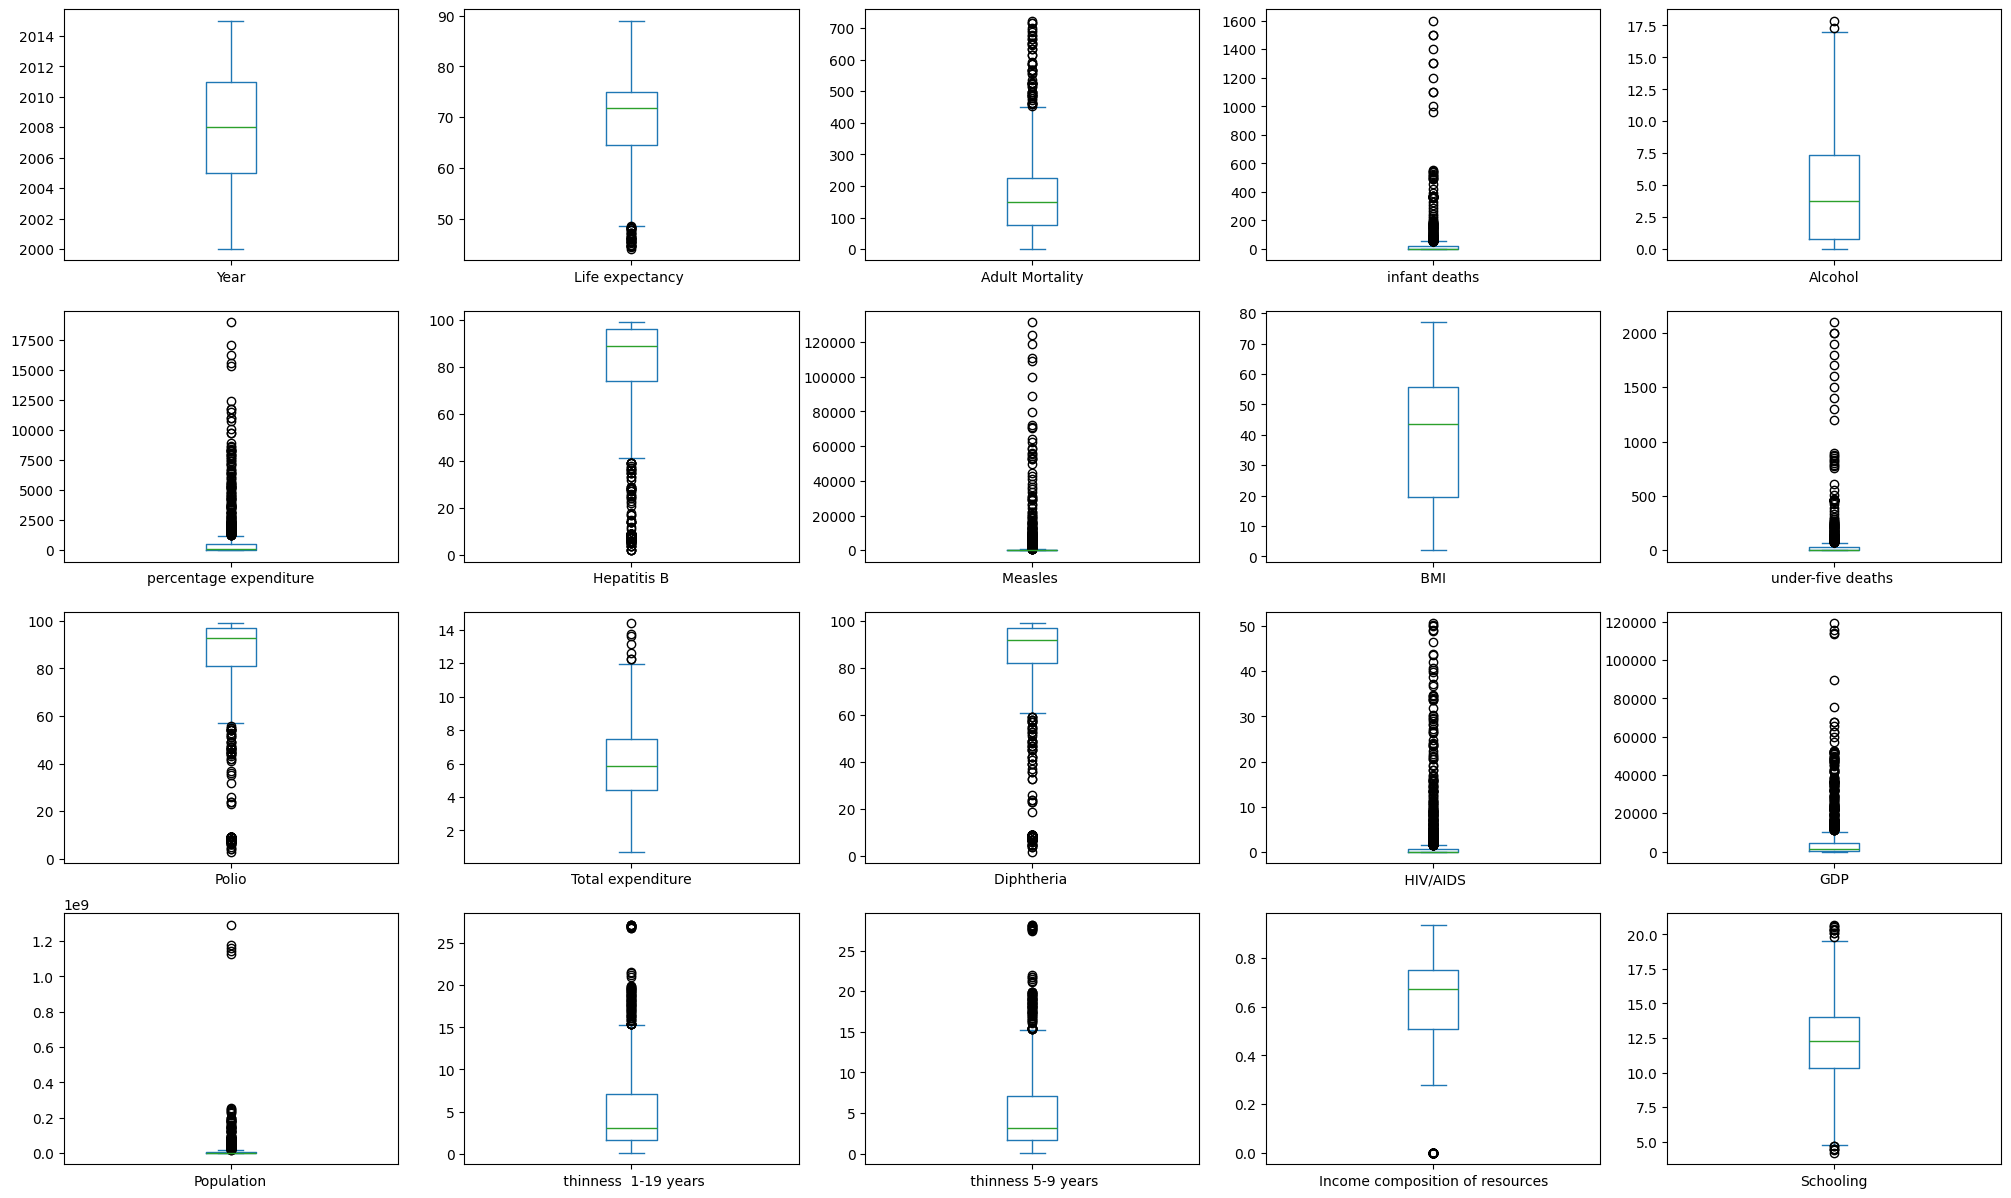

In [ ]:
# Boxplot
df_life_expec.plot(kind = 'box', subplots = True, layout = (4,5), sharex = False,  sharey = False, figsize = (25,15))
plt.show()

# Verificando correlações

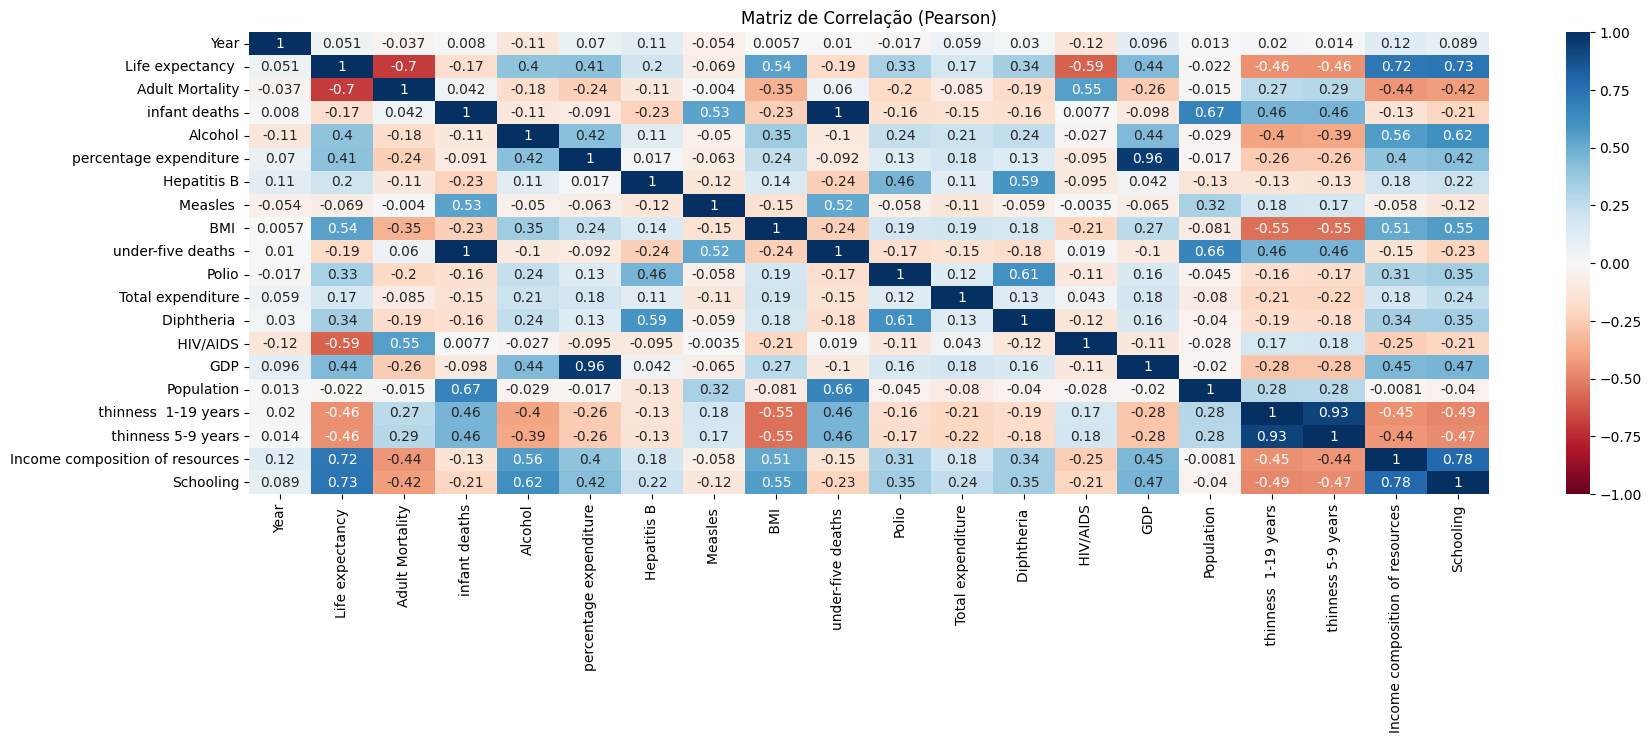

In [ ]:
# Selecionando apenas colunas numéricas para utilização da correlação de Pearson
df_num_life_expec = df_life_expec.select_dtypes(include=['float64', 'int64'])

# Correlação de Pearson
correlation_matrix = df_num_life_expec.corr(method='pearson')

# Plotar Matriz de Correlação
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Matriz de Correlação (Pearson)')
plt.show()

Alguns insights interessantes podem ser obtidos através da matriz de correlação. </br>
- **Correlações Positivas**
  - **Income composition of resources e Schooling (0.78)**: Uma maior composição de renda está positivamente relacionada com maiores níveis de escolaridade, indicando que países mais ricos investem mais em educação.
  - **Thinness 1-19 years e Thinness 5-9 years (0.93)**: Há uma correlação muito alta entre os níveis de magreza nessas faixas etárias, mostrando que ambas refletem condições similares de saúde infantil.
  - **Life Expectancy e Income composition of resources (0.72)**: A expectativa de vida está altamente correlacionada com a composição de renda, destacando o impacto de condições socioeconômicas na saúde.
  - **Life Expectancy e Schooling (0.73)**: A expectativa de vida também é fortemente associada à escolaridade, sugerindo que maior acesso à educação está relacionado a melhores condições de saúde e longevidade.

- **Correlações Negativas**
  - **Life Expectancy e Adult Mortality (-0.70)**: A mortalidade adulta está inversamente relacionada à expectativa de vida, confirmando que maiores taxas de mortalidade reduzem diretamente a longevidade média.
  - **HIV/AIDS e Life Expectancy (-0.59)**: Altas taxas de HIV/AIDS têm uma correlação negativa significativa com a expectativa de vida, destacando o impacto desta doença em algumas regiões.
  - **Thinness 1-19 years e Income composition of resources (-0.45)**: A magreza em crianças e adolescentes está negativamente relacionada à composição de renda, indicando que a desnutrição é mais prevalente em países de baixa renda.

  Podemos concluir que estas correlações destacam a importância de fatores socioeconômicos, como renda, escolaridade e investimento em saúde, na determinação de indicadores como expectativa de vida e mortalidade. </br>
  Além disso, evidenciam como condições de saúde específicas (como HIV/AIDS ou desnutrição) afetam negativamente esses indicadores.

# Preparação dos Dados

Divisão do dataset em conjuntos de treinamento e teste

In [ ]:
# Separando features (X) e target (y)
X = df_life_expec.drop(df_life_expec.columns[3], axis=1)  # Removendo a coluna target
y = df_life_expec.iloc[:, 3]  # Selecionando a coluna target

# Separação em bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Exibir informações
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

Tamanho do conjunto de treino: 1319
Tamanho do conjunto de teste: 330


# Pré-Processamento de Dados

* Conversão de Dados Categóricos:</br>
  * Codificação usando LabelEncoder.

In [ ]:
# Conversão dos dados categóricos 'Country' e 'Status' utilizando a técnica de
# Label Endoding

X_train['Country'] = LabelEncoder().fit_transform(X_train['Country'])
X_train['Status'] = LabelEncoder().fit_transform(X_train['Status'])


# Modelagem

* Modelos escolhidos:</br>
  * LinearRegression
  * Ridge
  * Lasso
  * KNN
  * CART
  * SVM
  * RandomForestRegressor
* Treinamento e Avaliação Inicial:</br>
  * Treino de cada modelo e avaliação de desempenho.
* Métrica de Avaliação utilizada:</br>
  * **Negative MAE (Mean Absolute Error)**:
    - amplamente utilizado na **validação cruzada** (que será realizada no bloco de código a seguir)
    - seu objetivo é **maximizar as métricas durante a seleção de modelos**

LR-orig: -2.780 (0.081)
Ridge-orig: -2.781 (0.079)
Lasso-orig: -2.927 (0.086)
KNN-orig: -6.548 (0.463)
CART-orig: -1.591 (0.137)
SVM-orig: -6.913 (0.529)
RF-orig: -1.142 (0.109)
LR-padr: -2.780 (0.081)
Ridge-padr: -2.779 (0.086)
Lasso-padr: -3.127 (0.156)
KNN-padr: -2.043 (0.173)
CART-padr: -1.569 (0.114)
SVM-padr: -2.490 (0.222)
RF-padr: -1.150 (0.114)
LR-norm: -2.780 (0.081)
Ridge-norm: -2.822 (0.089)
Lasso-norm: -6.197 (0.508)
KNN-norm: -2.195 (0.190)
CART-norm: -1.548 (0.131)
SVM-norm: -2.612 (0.159)
RF-norm: -1.159 (0.109)


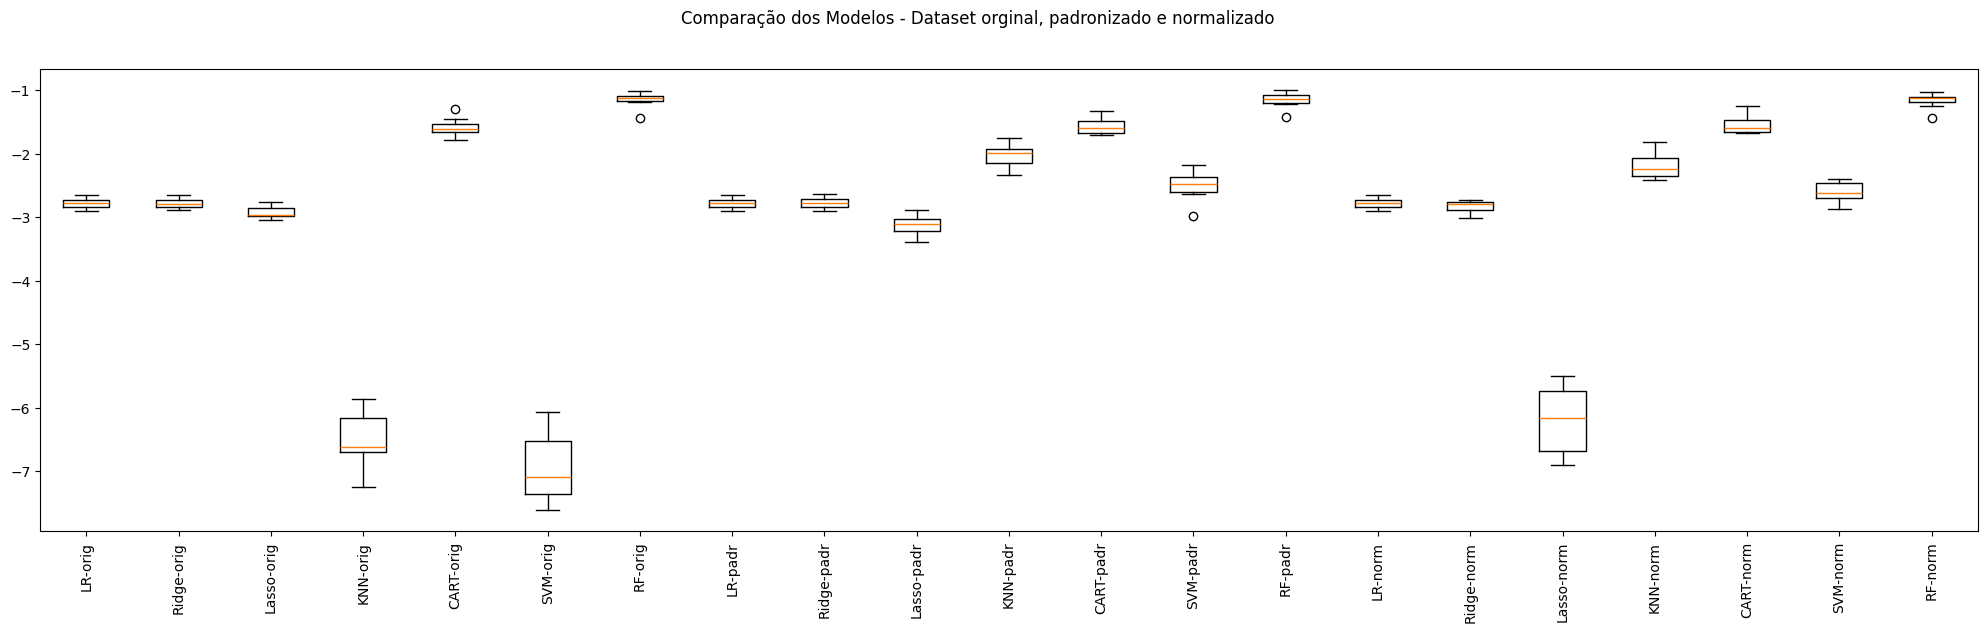

In [ ]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_linear = ('LR', LinearRegression())
reg_ridge = ('Ridge', Ridge())
reg_lasso = ('Lasso', Lasso())
reg_knn = ('KNN', KNeighborsRegressor())
reg_cart = ('CART', DecisionTreeRegressor())
reg_svm = ('SVM', SVR())
reg_rf = ('RF', RandomForestRegressor())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_linear])))
pipelines.append(('Ridge-orig', Pipeline([reg_ridge])))
pipelines.append(('Lasso-orig', Pipeline([reg_lasso])))
pipelines.append(('KNN-orig', Pipeline([reg_knn])))
pipelines.append(('CART-orig', Pipeline([reg_cart])))
pipelines.append(('SVM-orig', Pipeline([reg_svm])))
pipelines.append(('RF-orig', Pipeline([reg_rf])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_linear])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, reg_ridge])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, reg_lasso])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, reg_knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, reg_cart])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, reg_svm])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, reg_rf])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_linear])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, reg_ridge])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, reg_lasso])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, reg_knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, reg_cart])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, reg_svm])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, reg_rf])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

De acordo com o gráfico acima, podemos concluir que os **melhores resultados**, com base na métrica de avaliação 'Negative MAE', foi o **modelo RandomForest**.</br>
Além disso, dentre as 3 versões apresentadas (original, dados normalizados e dados padronizados), a que demonstrou **melhor desempenho foi a versão com os dados originais** com um erro médio de aproximadamente 1.

# Otimização do Modelo

* **Ajuste de Hiperparâmetros**:</br>
  * Uso de GridSearchCV para tentar encontrar melhores parâmetros.
* **Feature Selection**:</br>
  * Uso de SelectKBest para seleção das 5 melhores features com base na métrica 'f_classif' para ajudar na redução da dimensionalidade e a manter apenas as variáveis mais relevantes para o modelo
* **Reavaliação do Modelo Otimizado**:</br>
  * Comparação do desempenho do modelo otimizado com os outros

## Ajuste de Hiperparâmetros

In [ ]:
# Escolha de configurações dos hiperparâmetros para o modelo com melhor
# desempenho: RandomForest

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

pipelines.append(('RF-orig', Pipeline(steps=[reg_rf])))
pipelines.append(('RF-padr', Pipeline(steps=[standard_scaler, reg_rf])))
pipelines.append(('RF-norm', Pipeline(steps=[min_max_scaler, reg_rf])))

# Hiperparâmetros escolhidos (não foram selecionadas tantas variações para não
# comprometer o tempo de execução do notebook)
param_distributions = {
    'RF__min_samples_split': [2, 5], # Número mínimo de amostras para dividir um nó interno
    'RF__min_samples_leaf': [1, 2], # Número mínimo de amostras que um nó folha deve conter
    'RF__max_features': ['auto', 'sqrt', 'log2'] # Número de features a considerar ao dividir um nó
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid_search = GridSearchCV(estimator=model, param_grid=param_distributions, scoring='neg_mean_absolute_error', cv=kfold)
    grid_search.fit(X_train, y_train)
    print("%s - Melhor: %f usando %s" % (name, grid_search.best_score_, grid_search.best_params_))

RF-orig - Melhor: -1.258832 usando {'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}
RF-padr - Melhor: -1.254281 usando {'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}
RF-norm - Melhor: -1.246066 usando {'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}


Como visto anteriormente, o modelo RandomForest com os dados originais e seus valores default de hiperparâmetros apresentou um 'Negative MAE' de '-1,142'.</br>
Considerando as variações de hiperparâmetros acima, podemos dizer que todos tiveram um bom desempenho, sendo o 'RandonForest com dados normalizados e os hiperparâmetros indicados acima' aquele que apresentou os melhores resultados. </br>
**Mas ainda assim, nenhum deles conseguiu superar o desempenho do 'RandomForest com dados originais e hiperparâmetros default'.**

## Feature Selection

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)

# Executa a função de pontuação nos dados de treino e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)

# Reduz X_train para os atributos selecionados
features = fit.transform(X_train)

# Resultados
print('\nNúmero original de atributos:', X_train.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df_life_expec.drop(df_life_expec.columns[3], axis=1).columns)

# Exibe as pontuações de cada atributos e os 5 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df_life_expec.drop(df_life_expec.columns[3], axis=1).columns))


Número original de atributos: 21

Número reduzido de atributos: 5

Atributos Originais: Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Scores dos Atributos Originais: [ 1.136  1.772  3.306  8.194  1.249  2.899  3.993  1.234  1.401  2.819
  1.354  1.878  1.786  1.859 20.383  4.247  0.727  2.167  2.205  7.028
  7.995]

Atributos Selecionados: ['Adult Mortality' ' HIV/AIDS' 'GDP' 'Income composition of resources'
 'Schooling']


Podemos observar que o algoritmo 'SelectKBest' indicou as seguintes 5 melhores características:
* Percentual da População com HIV/AIDS
* Taxa de Mortalidade Adulta
* Taxa de escolaridade da população
* Índice de distribuição de renda e o acesso a recursos no país
* PIB

Conforme havíamos visto, este resultado só reforça que os fatores socioeconômicos e os investimentos na área da saúde influenciam diretamente na expectativa de vida da população.

RF-orig: -1.306 (0.131)
RF-padr: -1.296 (0.142)
RF-norm: -1.318 (0.133)


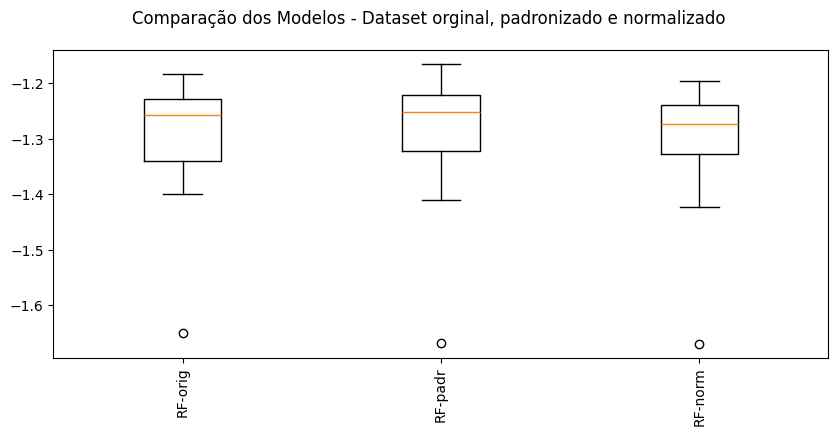

In [ ]:
# Treinamento do modelo utilizando os 5 atributos com pontuação mais alta

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []
results = []
names = []

# Definindo os Pipelines
pipelines.append(('RF-orig', Pipeline(steps=[reg_rf])))
pipelines.append(('RF-padr', Pipeline(steps=[standard_scaler, reg_rf])))
pipelines.append(('RF-norm', Pipeline(steps=[min_max_scaler, reg_rf])))

# Executando os Pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, features, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,4))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Vemos que o uso de Feature Selection apresentou um melhor desempenho em comparação a etapa de 'Ajustes de Hiperparâmetros'. </br>
O modelo 'RandomForest com dados padronizados e considerando somente as 5 features melhores pontuadas' apresentou um **erro Negative MAE de -1.296**.</br>

**Mas ainda assim, não conseguiu superar o desempenho do 'RandomForest com dados originais e hiperparâmetros default'.**

# Escolha do Melhor Modelo

Podemos concluir que o melhor modelo foi, sem dúvida, o **Random Forest**.</br>
E que, mesmo adotando técnicas como *'Feature Selection'* e *'Ajustes de Hiperparâmetros'*, ainda assim, o modelo original apresentou o melhor desempenho.</br>
Entenda 'original' como o modelo que utilizou os hiperparâmetros default e que teve como *input* os dados originais do dataset, ou seja, sem passarem pelas etapas de normalização ou padronização de dados.

# Conclusão

Para conclusão deste trabalho, sumarizo a seguir os 3 melhores modelos que foram obtidos:

| Modelo | Configuração | Negative MAE |
|--------|--------------|--------------|
| Random Forest | Dataset original e hiperparâmetros default | -1,142 |
| Random Forest | Dataset normalizado e hiperparâmetros alterados | -1,246 |
| Random Forest | Dataset padronizado e hiperparâmetros default | -1,296 |

O erro médio dos modelos foram bem próximos, mas é interessante notar que o modelo Random Forest original foi o que apresentou melhor desempenho.
